In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [2]:
#Load dataset
df = pd.read_csv(r"C:\AI and ML Intern\Task 6\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
#Drop Id column if present
df.drop(columns=['Id'], inplace=True, errors='ignore')

In [4]:
# Split features and target
X = df.drop('Species', axis=1)
Y = df['Species']

In [5]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
#Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Spliting dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
#Initialize and train KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
#Predict and evaluate
Y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
#Visualize decision boundaries using only first 2 features
def plot_decision_boundaries(X, y, model, title):
    # Use only the first 2 features for plotting
    X = X[:, :2]
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02

    # Create meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert predicted string labels to integers
    Z = pd.factorize(Z)[0]
    Z = Z.reshape(xx.shape)

    # Convert actual labels to integers for color mapping
    y_int = pd.factorize(y)[0]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['red', 'green', 'blue']))
    plt.scatter(X[:, 0], X[:, 1], c=y_int, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

In [20]:
# Fit a new model with only two features for plotting
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, Y_train_vis, Y_test_vis = train_test_split(X_vis, Y, test_size=0.2, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, Y_train_vis)

KNeighborsClassifier(n_neighbors=3)

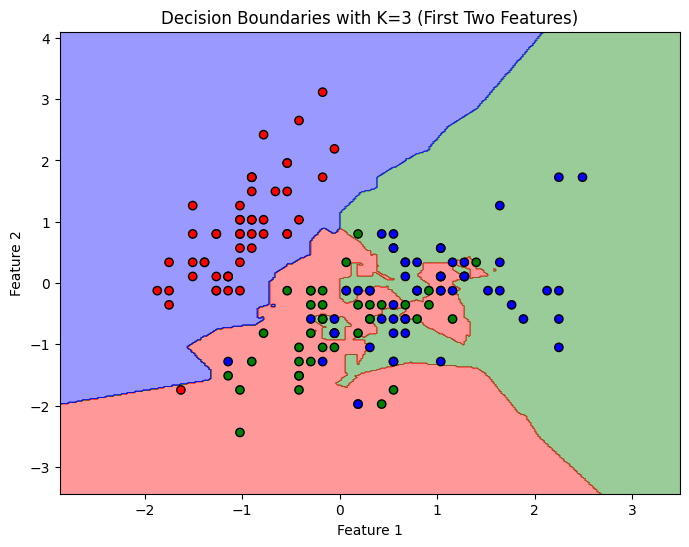

In [24]:
plot_decision_boundaries(X_vis, Y, knn_vis, "Decision Boundaries with K=3 (First Two Features)")